<a href="https://colab.research.google.com/github/agustinLapi/MachineLearning/blob/main/ML_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 1 - K vecinos más cercanos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 13  1]
 [ 0  2  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.91      0.89      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [8]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

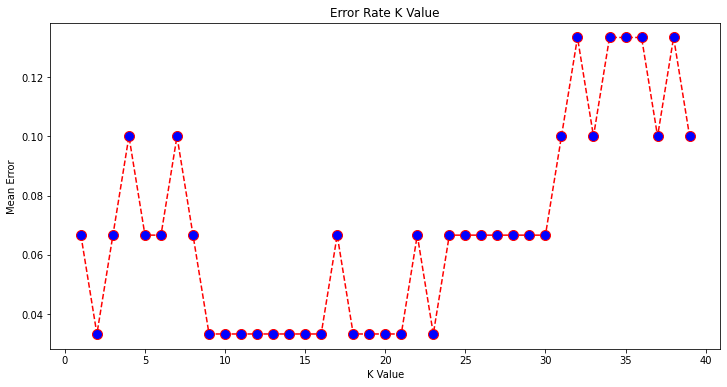

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##Repito lo anterior para un dataset propio, generado a partir de distribuciones normales cada uno con su respectiva media y variancia


In [10]:
import pandas as pd
import numpy as np
meanA, A_sd = 5, 1.5
meanB, B_sd = 8, 1.8
n = 50

A_df = pd.DataFrame(np.random.normal(meanA, A_sd, size=n),columns=['Tamaños'])
B_df = pd.DataFrame(np.random.normal(meanB, B_sd, size=n),columns=['Tamaños'])
y = pd.DataFrame(np.random.randint(1,5, size=2*n), columns=['Y'])
A_df['Clase'] = 'A'
B_df['Clase'] = 'B'

C_df =  pd.concat([A_df, B_df], axis=0)
C_df.reset_index(drop=True, inplace=True)
data_df = pd.concat([C_df, y] , axis=1)
data_df
Clases = data_df["Clase"]
data_df = data_df[["Tamaños", "Y"]]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df, Clases, test_size=0.40)
#Divido a una razon de 60-40 para entrenar y testear

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = classifier.predict(X_test)
#realizo la predicción

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  8]
 [ 2 17]]
              precision    recall  f1-score   support

           A       0.87      0.62      0.72        21
           B       0.68      0.89      0.77        19

    accuracy                           0.75        40
   macro avg       0.77      0.76      0.75        40
weighted avg       0.78      0.75      0.75        40



Confusion matrix:
[[13  8]
 [ 2 17]]


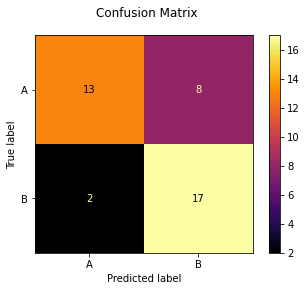

In [16]:
from sklearn import metrics 
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [17]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

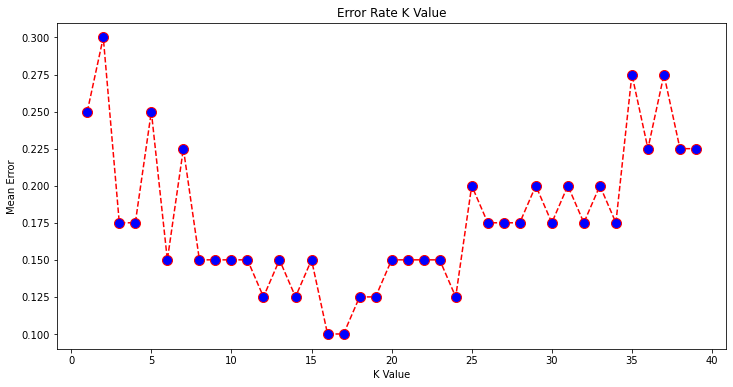

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#Plotting error rate for k values between 1 and 40

In [19]:
#Agrego dos dimensiones al dataset para evaluar cómo cambia
meanD, D_sd = 120, 5.7
meanE, E_sd = 135, 8.3

D_df = pd.DataFrame(np.random.normal(meanD, D_sd, size=n),columns=['Longitud'])
E_df = pd.DataFrame(np.random.normal(meanE, E_sd, size=n),columns=['Longitud'])

w = pd.DataFrame(np.random.randint(3,7, size=2*n), columns=['w'])


My_df =  pd.concat([D_df, E_df], axis=0)
My_df.reset_index(drop=True, inplace=True)
data_df.reset_index(drop=True, inplace=True)
data2_df = pd.concat([data_df, My_df, w] , axis=1)


In [20]:
data2_df.head

#Hago split entre train y test
X_train, X_test, y_train, y_test = train_test_split(data2_df, Clases, test_size=0.40)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Clasificador vecinos con 11

classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#realizo la predicción



In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  5]
 [ 2 13]]
              precision    recall  f1-score   support

           A       0.91      0.80      0.85        25
           B       0.72      0.87      0.79        15

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.84      0.82      0.83        40



Confusion matrix:
[[20  5]
 [ 2 13]]


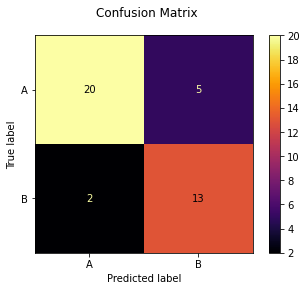

In [22]:
from sklearn import metrics 
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [23]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

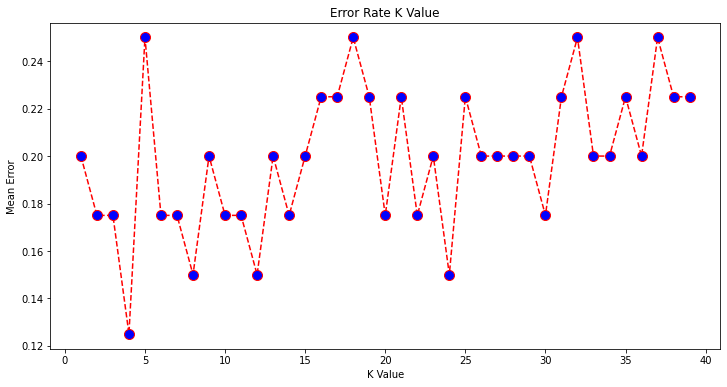

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [25]:
#Ahora incremento el N de 50 a 5000 y rehago todo

import pandas as pd
import numpy as np
meanA, A_sd = 5, 1.5
meanB, B_sd = 8, 1.8
n = 5000
#Repito lo anterior para un dataset propio, generado a partir de distribuciones normales cada uno con su respectiva media y variancia

A_df = pd.DataFrame(np.random.normal(meanA, A_sd, size=n),columns=['Tamaños'])
B_df = pd.DataFrame(np.random.normal(meanB, B_sd, size=n),columns=['Tamaños'])
y = pd.DataFrame(np.random.randint(1,5, size=2*n), columns=['Y'])
A_df['Clase'] = 'A'
B_df['Clase'] = 'B'

C_df =  pd.concat([A_df, B_df], axis=0)
C_df.reset_index(drop=True, inplace=True)
data_df = pd.concat([C_df, y] , axis=1)
data_df
Clases = data_df["Clase"]
data_df = data_df[["Tamaños", "Y"]]

D_df = pd.DataFrame(np.random.normal(meanD, D_sd, size=n),columns=['Longitud'])
E_df = pd.DataFrame(np.random.normal(meanE, E_sd, size=n),columns=['Longitud'])

w = pd.DataFrame(np.random.randint(3,7, size=2*n), columns=['w'])


My_df =  pd.concat([D_df, E_df], axis=0)
My_df.reset_index(drop=True, inplace=True)
data_df.reset_index(drop=True, inplace=True)
data2_df = pd.concat([data_df, My_df, w] , axis=1)



In [26]:
#Hago split entre train y test
X_train, X_test, y_train, y_test = train_test_split(data2_df, Clases, test_size=0.40)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Clasificador vecinos con 20

classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#realizo la predicción

In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1877  115]
 [ 206 1802]]
              precision    recall  f1-score   support

           A       0.90      0.94      0.92      1992
           B       0.94      0.90      0.92      2008

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



Confusion matrix:
[[1877  115]
 [ 206 1802]]


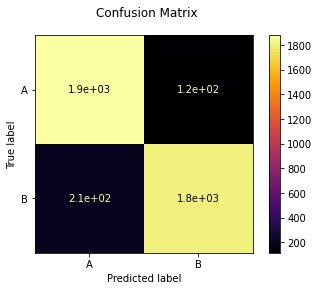

In [28]:
from sklearn import metrics 
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [29]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

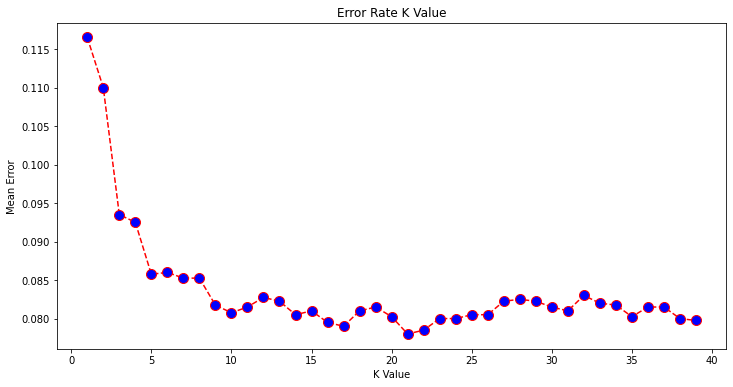

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#Conclusión ::
###En mi caso, debido a los datos generados que quizas no tienen una correlación real entre ellos, dado que son datos generados aleatoriamente. Al aumentar las dimensiones del dataset (de 2 a 4) el error minimo al predecir por el algoritmo de vecinos sube muy poco (de 0.1 a 0.12), 
###Luego tomé ese mismo dataset (multivariable) y aumenté su N a 5000, logrando reducir el error por debajo de 0.08, de todas formas, es decir la predicción por K vecinos más cercanos no muestra una mejora significativa (4%) al aumentar el tamaño de los datos de forma considerable (dos órdenes de magnitud)
######                ->¿Cuánto es una mejora significativa?<-


In [53]:
data2_df.head()

,Tamaños,Y,Longitud,w
0,2.080941,3,111.559128,3
1,6.790833,3,116.072364,5
2,4.798309,3,117.142957,3
3,2.217334,1,123.268286,5
4,5.186950,3,120.582157,4


#Ejercicio 2 - Grid Search (Opcional)

In [54]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import sys
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
cols= ["Tamaños", "Y", "Longitud", "w"]
X = data2_df[cols]
Y = Clases

scaler = StandardScaler().fit(X)

# Transform and display the training data
X_standardized = scaler.transform(X)

data = pd.DataFrame(X_standardized)



In [55]:
def create_model(learn_rate, dropout_rate):
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    adam = Adam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn=create_model, verbose=1)


In [56]:
# Define the parameters that you wish to use in your Grid Search along
# with the list of values that you wish to try out
learn_rate = [0.001, 0.02, 0.2]
dropout_rate = [0.0, 0.2, 0.4]
batch_size = [10, 20, 30]
epochs = [1, 5, 10]

seed = 42

# Make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate, batch_size=batch_size, epochs=epochs )

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid,
                    cv=KFold(random_state=seed), verbose=10)

grid_results = grid.fit(X_standardized, Y)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....
200/200 [==============================] - 0s 931us/step - loss: 0.2698 - accuracy: 0.9060
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=0.906, total=   2.2s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


200/200 [==============================] - 0s 963us/step - loss: 0.1960 - accuracy: 0.9215
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=0.922, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


200/200 [==============================] - 0s 956us/step - loss: 0.2016 - accuracy: 0.9215
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=0.922, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s remaining:    0.0s


200/200 [==============================] - 0s 977us/step - loss: 0.2900 - accuracy: 0.8660
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=0.866, total=   2.1s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.1s remaining:    0.0s


200/200 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.8630
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=0.863, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.0s remaining:    0.0s


200/200 [==============================] - 0s 984us/step - loss: 0.2061 - accuracy: 0.9280
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=0.928, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.9s remaining:    0.0s


200/200 [==============================] - 0s 961us/step - loss: 0.3148 - accuracy: 0.8825
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=0.882, total=   2.0s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.9s remaining:    0.0s


200/200 [==============================] - 0s 994us/step - loss: 0.1991 - accuracy: 0.9210
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=0.921, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.8s remaining:    0.0s


200/200 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8835
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=0.883, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.7s remaining:    0.0s


Se han truncado las últimas 5000 líneas del flujo de salida.
800/800 [==============================] - 1s 1ms/step - loss: 0.1952 - accuracy: 0.9182
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1891 - accuracy: 0.9223
Epoch 6/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1865 - accuracy: 0.9206
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1916 - accuracy: 0.9246
Epoch 8/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1929 - accuracy: 0.9260
Epoch 9/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1902 - accuracy: 0.9256
Epoch 10/10
200/200 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.8940
[CV]  batch_size=10, dropout_rate=0.0, epochs=10, learn_rate=0.02, score=0.894, total=  11.6s
[CV] batch_size=10, dropout_rate=0.0, epochs=10, learn_rate=0.02 .....
Epoch 1/10
800/800 [==============================] - 1s 1ms/step - loss: 0.2668 - a

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 36.0min finished


334/334 [==============================] - 1s 1ms/step - loss: 0.3502 - accuracy: 0.8674
Epoch 2/5
334/334 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8600
Epoch 3/5
334/334 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8667
Epoch 4/5
334/334 [==============================] - 1s 2ms/step - loss: 0.3680 - accuracy: 0.8675
Epoch 5/5
334/334 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8519
Best: 0.9192000031471252, using {'batch_size': 30, 'dropout_rate': 0.2, 'epochs': 5, 'learn_rate': 0.2}
0.8956000089645386 (0.026033459147386157) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 1, 'learn_rate': 0.001}
0.9007999897003174 (0.019602549272791696) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 1, 'learn_rate': 0.02}
0.8844000101089478 (0.07016009843672655) with: {'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 1, 'learn_rate': 0.2}
0.9015999913215638 (0.014182388035399672) with: {

#Ejercicio 3 - Spotify Analysis

In [32]:
import pandas as pd
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

#attributes_spotify.head(-20)


##Parámetros
####Los parámetros más importantes de la canción para mí son :
#####Danceability : de acuerdo al estilo de música de la persona, puede gustarle una canción de acuerdo si este parámetro es alto (ej reggaeton) o bajo (ej música clásica)
#####Energy : permite disasociar canciones canciones, dónde el espectro más grande (quizás) queda en el medio. Dado que, un valor bajo se corresponde con música clásica, y un valor alto se corresponde con death metal
#####Liveness : todo buen amante del rock prefiere pistas en vivo a pistas estudio, más aún si suenan igual en ambos ámbitos
#####Loudness : medio díficil de justificar, pero no solemos preferir canciones que se escuchan bajo

####Parámetros que considero NO tan importantes, y que por eso eliminaré del dataset
#####Duration : la duración de la canción es indistinta, si una canción por si sola es demasiado larga, uno la salta y listo, y por otro lado, se pueden likear tanto canciones como remix (o enganchados, etc), cuya longitud es extendida.
#####Valence : considero que es ambivalente si la canción es triste o alegre, dado que por lo general, poner de un tipo u otro depende más del estado de ánimo de la persona que de si te gusta o no. 
#####Key & Mode : no le encuentro importancia significativa al tono de la canción
#####Tempo & time_signature : al igual que Key & Mode

In [33]:

attributes_spotify.describe()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [34]:
col_names = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "target"]
attributes_spotify_filtered = attributes_spotify[col_names]
attributes_spotify_filtered.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,target
0,0.0102,0.833,0.434,0.021900,0.1650,-8.795,0.4310,1
1,0.1990,0.743,0.359,0.006110,0.1370,-10.401,0.0794,1
2,0.0344,0.838,0.412,0.000234,0.1590,-7.148,0.2890,1
3,0.6040,0.494,0.338,0.510000,0.0922,-15.236,0.0261,1
4,0.1800,0.678,0.561,0.512000,0.4390,-11.648,0.0694,1


In [35]:
Liked_df = attributes_spotify["target"]
attributes_spotify_filtered = attributes_spotify_filtered[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness"]]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(attributes_spotify_filtered, Liked_df, test_size=0.40)
#Divido a una razon de 60-40 para entrenar y testear

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
#Dado que es un dataset de 2000+ canciones voy a poner n_neighbors en 10. Luego de plotear el error, recalculo para 8 (error minimo)
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [39]:
y_pred = classifier.predict(X_test)
#realizo la predicción

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[333  87]
 [141 246]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       420
           1       0.74      0.64      0.68       387

    accuracy                           0.72       807
   macro avg       0.72      0.71      0.71       807
weighted avg       0.72      0.72      0.72       807



Confusion matrix:
[[333  87]
 [141 246]]


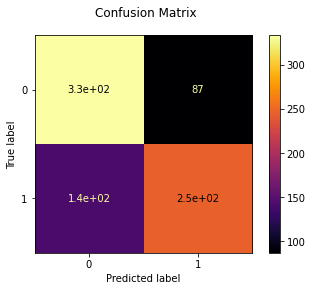

In [41]:
from sklearn import metrics 
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [42]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

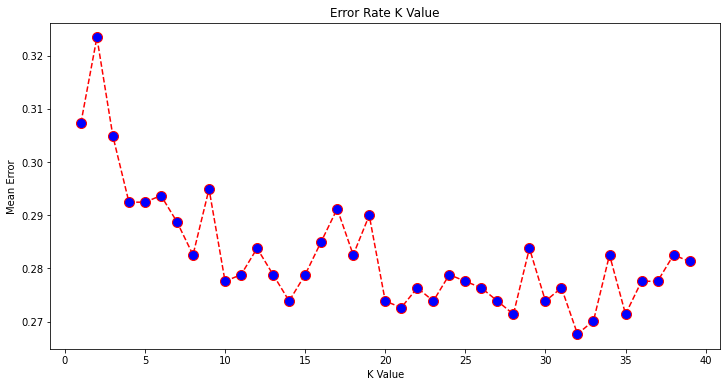

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [44]:
#Ahora voy a recalcular todo, sin sacar variables y ver si hay cambios significativos 
col_names = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence","target" ]
attributes_spotify_filtered = attributes_spotify[col_names]
attributes_spotify_filtered.head()
col_names = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence"]
Liked_df = attributes_spotify["target"]
attributes_spotify_filtered = attributes_spotify_filtered[col_names]

X_train, X_test, y_train, y_test = train_test_split(attributes_spotify_filtered, Liked_df, test_size=0.40)
#Divido a una razon de 60-40 para entrenar y testear

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Tomo n=8 (mejor resultado para el try anterior). Rehago el try con n=9 (segundo mejor resultado de este try)
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
#realizo la predicción

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[309  88]
 [164 246]]
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       397
           1       0.74      0.60      0.66       410

    accuracy                           0.69       807
   macro avg       0.69      0.69      0.69       807
weighted avg       0.70      0.69      0.69       807



Confusion matrix:
[[309  88]
 [164 246]]


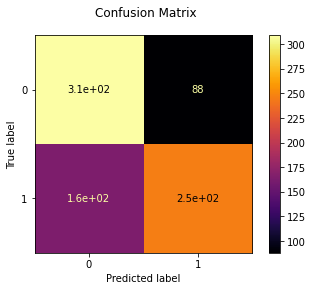

In [45]:
from sklearn import metrics 
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [46]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

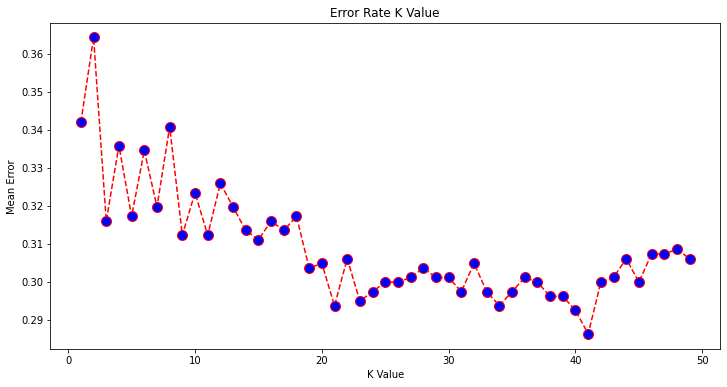

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#Conclusiones
###Para el primer dataset se ha obtenido predicciones satisfactorias con un error de 0.30
###En el segundo caso, fue posible disminuir éste error hasta 0.27
###Sin embargo, para el segundo dataset se computan todas las columnas de datos (13). Si tenemos ésto en cuenta, al escalar en cantidad de datos se torna mucho más costoso el algoritmo para no obtener una diferencia significativa en la predicción.
###Con el 54% de los datos totales (7 columnas de 13 -> primer dataset) se obtuvo prácticamente la misma efectividad de predicción que usando los datos totales. 
